In [1]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist .load_data()

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
X_train /= 255
X_test /=255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28, 1)))   #input defind here
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0154 - accuracy: 0.9948
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0104 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0120 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0122 - accuracy: 0.9961
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0115 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 31s 16m

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0921 - accuracy: 0.9851


[0.09206632524728775, 0.9850999712944031]

1/1 [==============================] - 0s 37ms/step
6


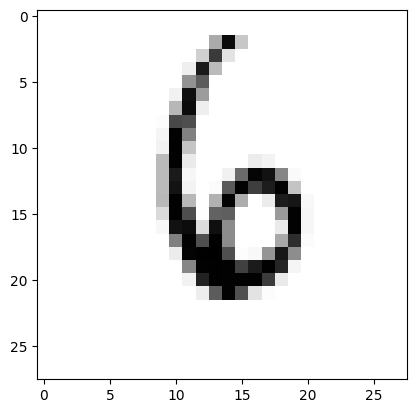

In [20]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
predict = X_test[image_index].reshape(28, 28)
predict = model.predict(X_test[image_index].reshape(1, 28, 28,1))
print(predict.argmax())